[[-9.77035045e-01  7.78357792e-01  0.00000000e+00]
 [ 1.43732074e+00  8.95604542e+00  1.00000000e+00]
 [-2.17743947e+00  4.07358475e+00  0.00000000e+00]
 [-1.84442643e-01  1.05734695e+01  1.00000000e+00]
 [-1.99143519e+00  2.96734550e+00  0.00000000e+00]
 [-1.55287651e-01  1.11722186e+01  1.00000000e+00]
 [ 1.04520980e-01  3.43849728e-01  0.00000000e+00]
 [-4.74656496e-01  1.05875164e+01  1.00000000e+00]
 [-1.54314039e-01  1.45304422e+00  0.00000000e+00]
 [-1.13375896e+00  9.08875044e+00  1.00000000e+00]
 [ 7.49767135e-02  1.13529650e+01  1.00000000e+00]
 [ 1.63922781e+00  1.38435418e+00  0.00000000e+00]
 [ 7.45338743e-01  1.00562041e+01  1.00000000e+00]
 [-5.63038030e-01  9.13512480e+00  1.00000000e+00]
 [ 1.93247329e+00  3.47572359e+00  0.00000000e+00]
 [ 2.23994805e+00  3.68617339e+00  0.00000000e+00]
 [-8.74923926e-01  2.28046321e+00  0.00000000e+00]
 [-1.48805207e+00  4.29893502e+00  0.00000000e+00]
 [ 1.80509685e-02  1.05591470e+00  0.00000000e+00]
 [-2.64798066e-01  1.14281085e+

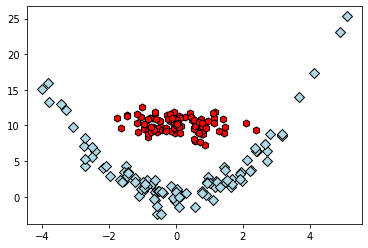

In [7]:
#ZADATAK-1
import numpy as np
import matplotlib.pyplot as plt 

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)
        
print(random_trained_data)

#ZADATAK-2
for i in range (0,len(random_trained_data)):
    if(random_trained_data[i,2]<1):
        color= 'lightblue'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(random_trained_data[i,2]>=0):
        color= 'red'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='h',edgecolors='black')


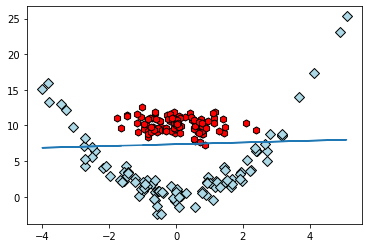

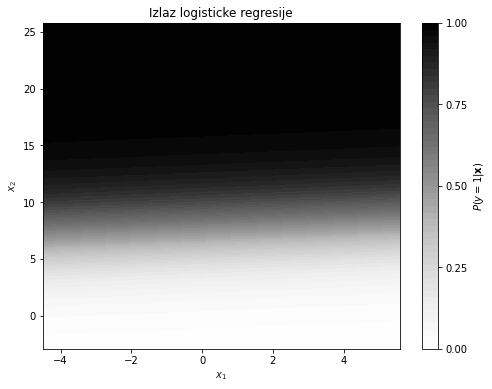

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

X_train = random_trained_data[:,:-1]
Y_train = random_trained_data[:,-1]

X_test=random_test_data[:,:-1]
Y_test= random_test_data[:,-1]
logRegr = LogisticRegression()

logRegr.fit(X_train,Y_train)

param = list(logRegr.coef_[0])
param.append(logRegr.intercept_[0])

x1= [x1 for x1 in X_train[:,0]]
x2 = [- param[2] / param[1] - param[0] * x1 / param[1] for x1 in X_train[:, 0]]
for i in range (0,len(random_trained_data)):
    if(random_trained_data[i,2]<1):
        color= 'lightblue'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(random_trained_data[i,2]>=0):
        color= 'red'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='h',edgecolors='black')
        
plt.plot(x1,x2)

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(random_trained_data[:,0])-0.5:max(random_trained_data[:,0])+0.5:.05,
 min(random_trained_data[:,1])-0.5:max(random_trained_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logRegr.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


#y_predicted = logRegr.predict(X_test)
#print(y_predicted)
#print(logRegr.score(X_test,Y_test))




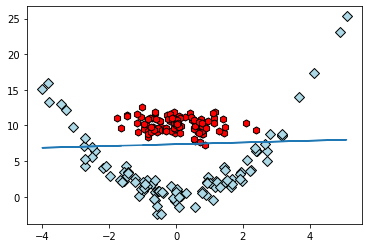

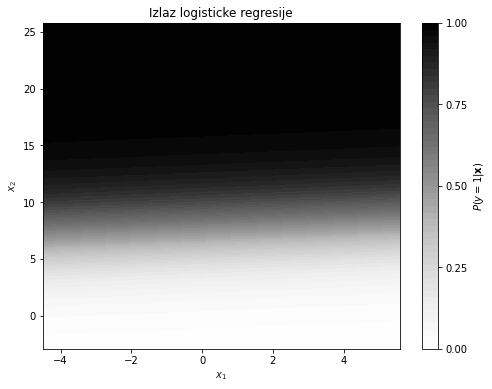

[[-8.76114619e-01  8.25845193e+00]
 [ 4.47408221e-02  8.89724138e+00]
 [ 3.88466499e-01  1.08061513e+01]
 [ 5.70454290e-02  7.98535669e+00]
 [ 6.37330576e-01  1.20882071e+00]
 [ 1.02541563e-02  1.59892846e-01]
 [ 2.86270551e-02  1.01947152e+01]
 [ 1.28152223e+00  3.05002698e+00]
 [-2.11724631e-01 -1.21439620e+00]
 [ 2.67166268e+00  6.44890277e+00]
 [ 4.09370862e-01  1.11795096e+01]
 [ 8.63789793e-01  8.49091915e+00]
 [-5.06443185e-01  8.58174501e+00]
 [-7.84183497e-02 -1.68350348e+00]
 [-3.06944268e+00  9.37006337e+00]
 [-5.76428676e-01  1.07150721e+01]
 [-1.14376212e+00  9.10312061e-01]
 [-3.36351302e+00  1.08518249e+01]
 [-9.49966389e-01  1.21177315e+01]
 [-1.82773829e+00  4.36983844e+00]
 [-1.36285176e+00  2.72497687e+00]
 [-2.40455340e-01 -6.58444816e-01]
 [ 1.05466533e+00 -5.75377372e-01]
 [-1.99440767e+00  1.88597076e+00]
 [-7.15930492e-02  1.00174554e+01]
 [-3.54084323e-01  9.43287798e+00]
 [ 6.61023144e-01  7.13048884e+00]
 [ 2.68471274e+00  7.76374289e+00]
 [ 7.53770817e-01  9

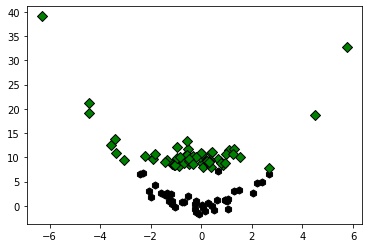

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

X_train = random_trained_data[:,:-1]
Y_train = random_trained_data[:,-1]

X_test=random_test_data[:,:-1]
Y_test= random_test_data[:,-1]
logRegr = LogisticRegression()

logRegr.fit(X_train,Y_train)

param = list(logRegr.coef_[0])
param.append(logRegr.intercept_[0])

x1= [x1 for x1 in X_train[:,0]]
x2 = [- param[2] / param[1] - param[0] * x1 / param[1] for x1 in X_train[:, 0]]
for i in range (0,len(random_trained_data)):
    if(random_trained_data[i,2]<1):
        color= 'lightblue'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(random_trained_data[i,2]>=0):
        color= 'red'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='h',edgecolors='black')
        
plt.plot(x1,x2)

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(random_trained_data[:,0])-0.5:max(random_trained_data[:,0])+0.5:.05,
 min(random_trained_data[:,1])-0.5:max(random_trained_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logRegr.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

y_predicted = logRegr.predict(X_test)
print(X_test)

plt.figure()
for i in range(0,len(y_predicted)):
    if(y_predicted[i] ==1):
        color = 'green'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(y_predicted[i]==0):
        color= 'black'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='h',edgecolors='black')


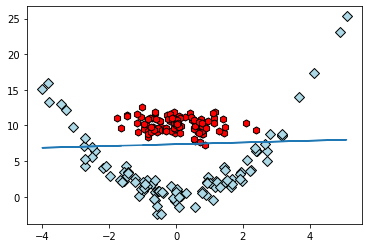

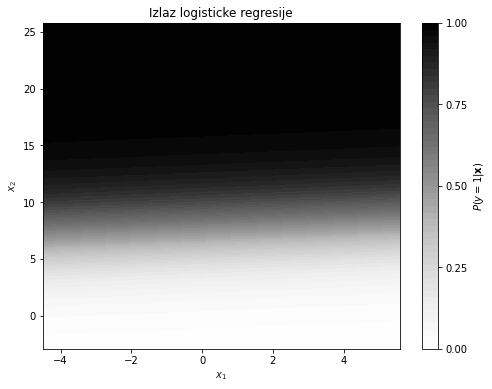

[[-8.76114619e-01  8.25845193e+00]
 [ 4.47408221e-02  8.89724138e+00]
 [ 3.88466499e-01  1.08061513e+01]
 [ 5.70454290e-02  7.98535669e+00]
 [ 6.37330576e-01  1.20882071e+00]
 [ 1.02541563e-02  1.59892846e-01]
 [ 2.86270551e-02  1.01947152e+01]
 [ 1.28152223e+00  3.05002698e+00]
 [-2.11724631e-01 -1.21439620e+00]
 [ 2.67166268e+00  6.44890277e+00]
 [ 4.09370862e-01  1.11795096e+01]
 [ 8.63789793e-01  8.49091915e+00]
 [-5.06443185e-01  8.58174501e+00]
 [-7.84183497e-02 -1.68350348e+00]
 [-3.06944268e+00  9.37006337e+00]
 [-5.76428676e-01  1.07150721e+01]
 [-1.14376212e+00  9.10312061e-01]
 [-3.36351302e+00  1.08518249e+01]
 [-9.49966389e-01  1.21177315e+01]
 [-1.82773829e+00  4.36983844e+00]
 [-1.36285176e+00  2.72497687e+00]
 [-2.40455340e-01 -6.58444816e-01]
 [ 1.05466533e+00 -5.75377372e-01]
 [-1.99440767e+00  1.88597076e+00]
 [-7.15930492e-02  1.00174554e+01]
 [-3.54084323e-01  9.43287798e+00]
 [ 6.61023144e-01  7.13048884e+00]
 [ 2.68471274e+00  7.76374289e+00]
 [ 7.53770817e-01  9

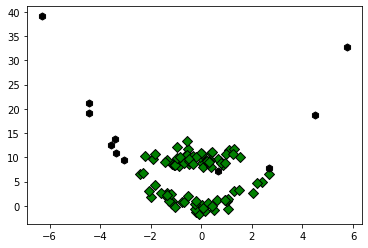

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

X_train = random_trained_data[:,:-1]
Y_train = random_trained_data[:,-1]

X_test= random_test_data[:,:-1]
Y_test= random_test_data[:,-1]

logRegr = LogisticRegression()

logRegr.fit(X_train,Y_train)

param = list(logRegr.coef_[0])
param.append(logRegr.intercept_[0])

x1= [x1 for x1 in X_train[:,0]]
x2 = [- param[2] / param[1] - param[0] * x1 / param[1] for x1 in X_train[:, 0]]
for i in range (0,len(random_trained_data)):
    if(random_trained_data[i,2]<1):
        color= 'lightblue'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(random_trained_data[i,2]>=0):
        color= 'red'
        plt.scatter(random_trained_data[i,0],random_trained_data[i,1],s=50,c=color,marker='h',edgecolors='black')
        
plt.plot(x1,x2)

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(random_trained_data[:,0])-0.5:max(random_trained_data[:,0])+0.5:.05,
 min(random_trained_data[:,1])-0.5:max(random_trained_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logRegr.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

y_predicted = logRegr.predict(X_test)
print(X_test)

plt.figure()
for i in range(0,len(y_predicted)):
    if(y_predicted[i] == Y_test[i]):
        color = 'green'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(y_predicted[i] != Y_test[i]):
        color= 'black'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='h',edgecolors='black')


Accuracy=  0.89
Missclasification rate=  0.10999999999999999
Precision=  0.8
Sensitivity=  0.975609756097561
Specificity=  0.8305084745762712


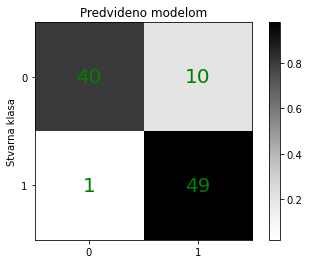

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(c_matrix):

 norm_conf = []
 for i in c_matrix:
     a = 0
     tmp_arr = []
     a = sum(i, 0)
     for j in i:
         tmp_arr.append(float(j)/float(a))
     norm_conf.append(tmp_arr)
 fig = plt.figure()
 ax = fig.add_subplot(111)
 res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')
 width = len(c_matrix)
 height = len(c_matrix[0])
 for x in range(width):
     for y in range(height):
         ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center', color = 'green', size = 20)
 fig.colorbar(res)
 numbers = '0123456789'
 plt.xticks(range(width), numbers[:width])
 plt.yticks(range(height), numbers[:height])

 plt.ylabel('Stvarna klasa')
 plt.title('Predvideno modelom')
 plt.show()

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

X_train = random_trained_data[:,:-1]
Y_train = random_trained_data[:,-1]

X_test= random_test_data[:,:-1]
Y_test= random_test_data[:,-1]

logRegr = LogisticRegression()
logRegr.fit(X_train,Y_train)
       

y_predicted = logRegr.predict(X_test)
confMatrix = confusion_matrix(Y_test, y_predicted)

#𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 =𝑇𝑃+𝑇𝑁 / 𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁
#𝑚𝑖𝑠𝑠𝑐𝑙𝑎𝑠𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑜𝑛 𝑟𝑎𝑡𝑒 = 1 − 𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦
#𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 =𝑇𝑃 / 𝑇𝑃+𝐹𝑃
#𝑟𝑒𝑐𝑎𝑙𝑙/𝑠𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦 = 𝑇𝑃 / 𝑇𝑃+𝐹𝑁
#𝑠𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 =𝑇𝑁 / 𝑇𝑁+𝐹p

print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))
plot_confusion_matrix(confMatrix)


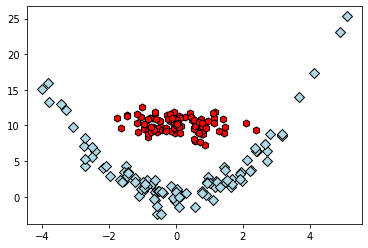

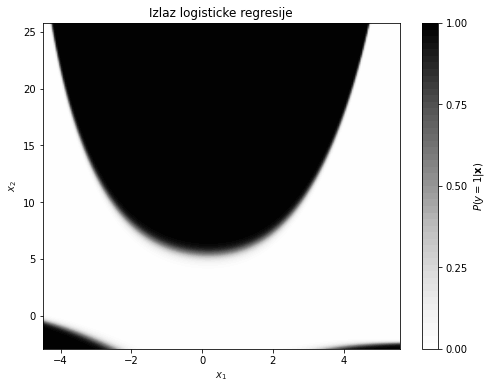

Accuracy=  1.0
Missclasification rate=  0.0
Precision=  1.0
Sensitivity=  1.0
Specificity=  1.0


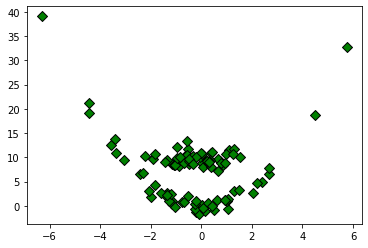

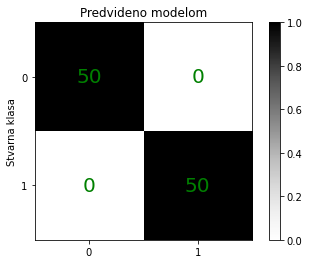

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):

 norm_conf = []
 for i in c_matrix:
     a = 0
     tmp_arr = []
     a = sum(i, 0)
     for j in i:
         tmp_arr.append(float(j)/float(a))
     norm_conf.append(tmp_arr)
 fig = plt.figure()
 ax = fig.add_subplot(111)
 res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')
 width = len(c_matrix)
 height = len(c_matrix[0])
 for x in range(width):
     for y in range(height):
         ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center', color = 'green', size = 20)
 fig.colorbar(res)
 numbers = '0123456789'
 plt.xticks(range(width), numbers[:width])
 plt.yticks(range(height), numbers[:height])

 plt.ylabel('Stvarna klasa')
 plt.title('Predvideno modelom')
 plt.show()

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

poly = PolynomialFeatures(degree=3, include_bias = False)
X_train = poly.fit_transform(random_trained_data[:,0:2])
Y_train = random_trained_data[:,-1]


X_test= poly.fit_transform(random_test_data[:,0:2])
Y_test= random_test_data[:,-1]

logRegr = LogisticRegression(max_iter = 500)
logRegr.fit(X_train,Y_train)

param = list(logRegr.coef_[0])
param.append(logRegr.intercept_[0])

for i in range (0,len(random_trained_data)):
    if(random_trained_data[i,2]<1):
        color= 'lightblue'
        plt.scatter(X_train[i,0],X_train[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(random_trained_data[i,2]>=0):
        color= 'red'
        plt.scatter(X_train[i,0],X_train[i,1],s=50,c=color,marker='h',edgecolors='black')
        

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(random_trained_data[:,0])-0.5:max(random_trained_data[:,0])+0.5:.05,
 min(random_trained_data[:,1])-0.5:max(random_trained_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid = poly.fit_transform(grid)
probs = logRegr.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

y_predicted = logRegr.predict(X_test)

plt.figure()
for i in range(0,len(y_predicted)):
    if(y_predicted[i] == Y_test[i]):
        color = 'green'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='D',edgecolors='black')
    elif(y_predicted[i] != Y_test[i]):
        color= 'black'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color,marker='h',edgecolors='black')

confMatrix = confusion_matrix(Y_test, y_predicted)
print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))

plot_confusion_matrix(confMatrix)




Accuracy=  0.3
Missclasification rate=  0.7
Precision=  0.6
Sensitivity=  0.375
Specificity=  0.0


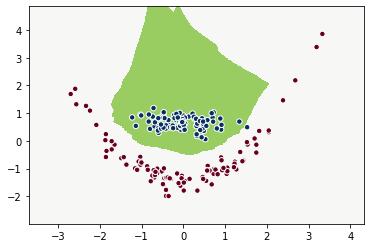

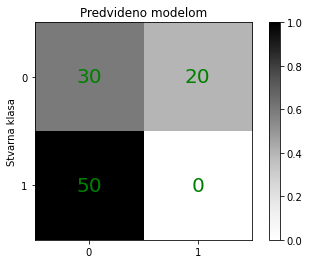

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


def plot_KNN(KNN_model, X, y):

 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
 np.arange(x2_min, x2_max, 0.01))

 Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z1.reshape(xx.shape)
 plt.figure()
 plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
 plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu', edgecolor='white', label = 'train')

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data
def plot_confusion_matrix(c_matrix):

 norm_conf = []
 for i in c_matrix:
     a = 0
     tmp_arr = []
     a = sum(i, 0)
     for j in i:
         tmp_arr.append(float(j)/float(a))
     norm_conf.append(tmp_arr)
 fig = plt.figure()
 ax = fig.add_subplot(111)
 res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')
 width = len(c_matrix)
 height = len(c_matrix[0])
 for x in range(width):
     for y in range(height):
         ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center', color = 'green', size = 20)
 fig.colorbar(res)
 numbers = '0123456789'
 plt.xticks(range(width), numbers[:width])
 plt.yticks(range(height), numbers[:height])

 plt.ylabel('Stvarna klasa')
 plt.title('Predvideno modelom')
 plt.show()

NUMBER_OF_TRAIN_DATA_SPECIMENS = 200
NUMBER_OF_TEST_DATA_SPECIMENS = 100
np.random.seed(242)
random_trained_data = generate_data(NUMBER_OF_TRAIN_DATA_SPECIMENS)

np.random.seed(12)
random_test_data = generate_data(NUMBER_OF_TEST_DATA_SPECIMENS)

X_train = random_trained_data[:,:-1]
Y_train = random_trained_data[:,-1]

X_test=random_test_data[:,:-1]
Y_test= random_test_data[:,-1]

X_train = preprocessing.scale(X_train)
neighbours= KNeighborsClassifier()
neighbours.fit(X_train,Y_train)
plot_KNN(neighbours, X_train, Y_train)

y_predicted = neighbours.predict(X_test)
confMatrix = confusion_matrix(Y_test, y_predicted)
print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))

plot_confusion_matrix(confMatrix)
